In [1]:
# Sentiment Analysis works on sequence data

In [2]:
# tanh activation function: -1 to +1 : RNN hidden layer
# threshold:0
# output layer : sigmoid

In [3]:
#Text classification : -
#Case Study :  To predict the given message is spam or not spam 
#Text Classification : -  
#Case Study : to predict Either mail is spam or not spam 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
import nltk
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
#To load dataser spam.csv 
df=pd.read_csv('/content/drive/MyDrive/NLP/review.csv')
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [6]:
# Drop unwanted column from dataset permenantly
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,review,sentiment
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


In [8]:
# Check null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
# check how many rows and columns
df.shape

(999, 2)

In [10]:
# To check data type
df.dtypes

review       object
sentiment     int64
dtype: object

In [11]:
# How many category in sentiment column
df['sentiment'].value_counts()

1    500
0    499
Name: sentiment, dtype: int64

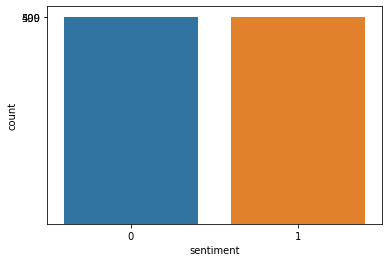

In [12]:
# Visualise form
sns.countplot(data=df,x='sentiment')
f=df['sentiment'].value_counts()
plt.yticks(f)
plt.show()

In [13]:
# positive review means sentiment=1
# negative review means sentiment=0
# create wordcloud : it is a image
from wordcloud import WordCloud

(-0.5, 799.5, 799.5, -0.5)

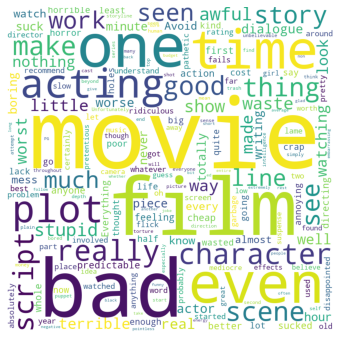

In [14]:
# create WordCloud for negative sentiment means -ve review means bad review
#First create a object of WordCloud class
wc=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wc.generate(''.join(df[df['sentiment']==0]['review']))

plt.figure(figsize=(6,6))
plt.imshow(wc)
plt.axis('off')

(-0.5, 799.5, 799.5, -0.5)

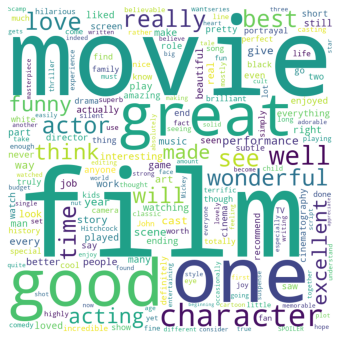

In [15]:
# create WordCloud for positive sentiment means -ve review means bad review
#First create a object of WordCloud class
wc=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wc.generate(''.join(df[df['sentiment']==1]['review']))

plt.figure(figsize=(6,6))
plt.imshow(wc)
plt.axis('off')

In [16]:
# from nltk.tokenize import word_tokenize 

In [17]:
# Create a user defined function for cleaning a message or text means
# text preporcessing (text mining)
def clean_text(text):
  # first convert in lower case
  text=text.lower()
  # second, apply word tokenizer on text
  tokens=word_tokenize(text)
  #  keep alphabets only and remove all special characters and digit from text
  word_tokens=[w for w in tokens if w.isalpha()]
  # remove stopwords
  # from nltk.corpus import stopwords    *******
  # first create the list of inbuilt stopwords
  stop=stopwords.words('english')
  clean_tokens=[w for w in word_tokens if w not in stop]
  # from nltk.stem import WordNetLemmatizer    ******
  # create object of WordNetLemmatizer class
  lemma=WordNetLemmatizer()
  lemma_tokens=[lemma.lemmatize(w) for w in clean_tokens]
  return ' '.join(lemma_tokens)

In [18]:
# call the function in main program
df['review']=df['review'].apply(clean_text)

In [19]:
df.head()

,review,sentiment
0,sure lost flat character audience nearly half ...,0
1,attempting artiness black white clever camera ...,0
2,little music anything speak,0
3,best scene movie gerardo trying find song keep...,1
4,rest movie lack art charm meaning emptiness wo...,0


In [20]:
# Select input and output from given dataset
X=df['review']   # input
Y=df['sentiment']   # target means output which we want to predict

In [21]:
#split data in to 80% 20%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [22]:
X_train.head()

382    set especially designed work camera amazing st...
904                 one boring pointless movie ever seen
981                                       sad movie good
47             whatever cost much translate quality sure
521    rating grade z note show bad even mother cast ...
Name: review, dtype: object

In [23]:
X_train.shape

(799,)

In [24]:
Y_train.head()

382    1
904    0
981    1
47     0
521    0
Name: sentiment, dtype: int64

In [25]:
len(X_train[0])

52

In [26]:
# find the no. of words in given review dataset
# first initialize empty list
sent_len=[]
for sent in df['review']:
  sent_len.append(len(word_tokenize(sent))) # add length of words of each msg on sent_len list

# To add new column sentece_length on existing dataset df
df['sentence_length']=sent_len
df.head()

,review,sentiment,sentence_length
0,sure lost flat character audience nearly half ...,0,8
1,attempting artiness black white clever camera ...,0,17
2,little music anything speak,0,4
3,best scene movie gerardo trying find song keep...,1,10
4,rest movie lack art charm meaning emptiness wo...,0,10


In [27]:
# Find maximum length of sentance
max(df['sentence_length'])

38

In [28]:
df['sentence_length'].value_counts()

5     126
3     108
4     104
2      94
7      82
6      74
8      62
9      62
1      39
11     38
10     38
12     38
14     25
13     24
15     14
16     12
17     10
21      8
19      8
18      7
20      5
24      3
26      3
0       3
23      2
28      2
22      2
36      1
33      1
31      1
27      1
38      1
25      1
Name: sentence_length, dtype: int64

In [29]:
np.quantile(df['sentence_length'],0.95)
# Taken sentence only 95% and 5% sacrifice

17.0

In [30]:
# We can see that 95% review text are of lengths less than or equal to 17.
# We will keep the max length to 17
max_len=17

In [31]:
# Tokenization, Keras level
from tensorflow.keras.preprocessing.text import Tokenizer

In [32]:
# Create object of Tokenizer class
tok=Tokenizer(char_level=False,split=' ')   # Tokenize at word level
# by default clar_level=True
tok.fit_on_texts(X_train)
# fit_on_texts()  inbuilt method of Tokenizer class

In [33]:
# Tosee unique id of each word, use inbuilt attributes index_word of Tokenizer
tok.index_word

{1: 'movie',
 2: 'film',
 3: 'one',
 4: 'bad',
 5: 'character',
 6: 'good',
 7: 'like',
 8: 'time',
 9: 'even',
 10: 'acting',
 11: 'really',
 12: 'great',
 13: 'well',
 14: 'scene',
 15: 'see',
 16: 'story',
 17: 'make',
 18: 'actor',
 19: 'best',
 20: 'work',
 21: 'made',
 22: 'could',
 23: 'plot',
 24: 'think',
 25: 'thing',
 26: 'look',
 27: 'ever',
 28: 'seen',
 29: 'script',
 30: 'love',
 31: 'better',
 32: 'way',
 33: 'wonderful',
 34: 'would',
 35: 'year',
 36: 'real',
 37: 'also',
 38: 'much',
 39: 'watch',
 40: 'watching',
 41: 'line',
 42: 'performance',
 43: 'part',
 44: 'never',
 45: 'excellent',
 46: 'stupid',
 47: 'show',
 48: 'cast',
 49: 'life',
 50: 'anyone',
 51: 'little',
 52: 'go',
 53: 'nothing',
 54: 'get',
 55: 'every',
 56: 'know',
 57: 'give',
 58: 'people',
 59: 'two',
 60: 'music',
 61: 'recommend',
 62: 'funny',
 63: 'say',
 64: 'pretty',
 65: 'dialogue',
 66: 'art',
 67: 'saw',
 68: 'waste',
 69: 'awful',
 70: 'terrible',
 71: 'man',
 72: 'many',
 73: 'lot

In [34]:
len(tok.index_word)

2269

In [35]:
X_train.head()

382    set especially designed work camera amazing st...
904                 one boring pointless movie ever seen
981                                       sad movie good
47             whatever cost much translate quality sure
521    rating grade z note show bad even mother cast ...
Name: review, dtype: object

In [36]:
sequence_train=tok.texts_to_sequences(X_train)
# texts_to_sequences() inbuilt method of Tokenizer class

In [37]:
sequence_train

[[181, 121, 825, 20, 122, 105, 826, 74, 313],
 [3, 106, 314, 1, 27, 28],
 [827, 1, 6],
 [315, 182, 38, 828, 316, 317],
 [142, 829, 830, 318, 47, 4, 9, 481, 48, 319, 320, 47],
 [831,
  832,
  27,
  12,
  482,
  183,
  16,
  833,
  321,
  184,
  834,
  835,
  836,
  185,
  837,
  838,
  183,
  107,
  186,
  236],
 [24, 2, 322, 839, 483, 840, 55, 75],
 [187, 5, 188, 237, 841],
 [11, 6, 47, 39],
 [484, 842, 189, 323, 143, 324, 843, 5, 49],
 [844, 845, 846],
 [74, 485, 2, 847, 848, 849, 850, 48],
 [238],
 [486, 76, 4, 325, 2, 121, 11, 7, 190, 2, 4, 144, 3, 145, 50, 22, 487],
 [851, 108, 123, 4, 63],
 [16, 488, 852, 853, 854, 489, 35, 490, 11, 491, 855, 492, 493, 5, 856],
 [56, 239],
 [29, 29],
 [56, 857, 858, 326, 22, 38, 859, 13, 860],
 [57, 3, 861],
 [108,
  1,
  494,
  9,
  862,
  63,
  327,
  328,
  495,
  146,
  191,
  17,
  329,
  496,
  147,
  192,
  497,
  191,
  17,
  329,
  25],
 [3, 106, 148, 1, 863, 330, 238, 864, 106, 865],
 [498, 866, 40, 2],
 [16, 41, 77, 86],
 [331, 867, 63,

Aug_28th

In [38]:
X_train.shape

(799,)

In [39]:
max_len

17

In [40]:
from tensorflow.keras.preprocessing import sequence

In [41]:
sequence_matrix_train=sequence.pad_sequences(sequence_train,maxlen=max_len)

In [42]:
sequence_matrix_train

array([[  0,   0,   0, ..., 826,  74, 313],
       [  0,   0,   0, ...,   1,  27,  28],
       [  0,   0,   0, ..., 827,   1,   6],
       ...,
       [  0,   0,   0, ...,   9,  36,   1],
       [  0,   0,   0, ...,  65,  22,  52],
       [  0,   0,   0, ...,   0, 421, 770]], dtype=int32)

In [43]:
# Access first sequence
sequence_matrix_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0, 181, 121, 825,  20, 122,
       105, 826,  74, 313], dtype=int32)

In [44]:
# Access second sequence
sequence_matrix_train[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3, 106,
       314,   1,  27,  28], dtype=int32)

In [45]:
# Now create a sequential model means goes to neural network
# to train the model
from tensorflow.keras.models import Sequential

In [46]:
# Create object of Sequential model class
model=Sequential()

In [47]:
vocab_len=len(tok.index_word)
vocab_len

2269

In [48]:
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense,Dropout
#from tensorflow.keras.layers import Bidirectional
# RNN means recurrent neural network
# To add layers in object of Sequential class
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
# Second Parameter is passing the length of output
# mask_zero : it wont consume time on zero padding
model.add(SimpleRNN(units=64,activation='tanh'))
# tanh: tangent hyperbolic activation function used in RNN(sequence type)
model.add(Dense(64,activation='relu'))  # add hidden layer
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))  # add output layer

In [49]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
# #create a procedure for callback(Earlystopping)
#Early Stopping : 
#EarlyStopping : for decide epoch
#create a procedure for callback 
from tensorflow.keras.callbacks import EarlyStopping             
#create callback : -
#EarlyStopping() inbuilt function
cb=EarlyStopping(
    monitor="val_loss",  #val_loss means testing error
    min_delta=0.00001, #value of lambda 
    patience=20,
    verbose=1,
    mode="auto", #min loss 
    baseline=None,
    restore_best_weights=False
)

In [51]:
# train the model
model.fit(sequence_matrix_train,Y_train,epochs=1000,batch_size=50,
          validation_split=0.2,callbacks=cb)

Epoch 1/1000
13/13 [==============================] - 5s 131ms/step - loss: 0.6878 - accuracy: 0.5368 - val_loss: 0.6834 - val_accuracy: 0.6313
Epoch 2/1000
13/13 [==============================] - 1s 68ms/step - loss: 0.5223 - accuracy: 0.9484 - val_loss: 0.5966 - val_accuracy: 0.7250
Epoch 3/1000
13/13 [==============================] - 1s 83ms/step - loss: 0.2595 - accuracy: 0.9718 - val_loss: 0.5540 - val_accuracy: 0.7625
Epoch 4/1000
13/13 [==============================] - 1s 57ms/step - loss: 0.0963 - accuracy: 0.9844 - val_loss: 0.6564 - val_accuracy: 0.7563
Epoch 5/1000
13/13 [==============================] - 1s 61ms/step - loss: 0.0404 - accuracy: 0.9937 - val_loss: 0.7339 - val_accuracy: 0.7688
Epoch 6/1000
13/13 [==============================] - 1s 77ms/step - loss: 0.0236 - accuracy: 0.9937 - val_loss: 0.8022 - val_accuracy: 0.7750
Epoch 7/1000
13/13 [==============================] - 1s 73ms/step - loss: 0.0171 - accuracy: 0.9937 - val_loss: 0.8675 - val_accuracy: 0.768

In [52]:
X_test

507                          film lack convincing script
608                also enough hypocrisy film make vomit
452                                 even good camp value
368    make scared horrified make sympathetic towards...
242    film great actor master director significant t...
                             ...                        
430    filmmaker director would hide head sand spent ...
587    even woman finally show sign improvement expec...
550                               may bad film ever made
607                            accent absolutely abysmal
207    another thing really like character got punche...
Name: review, Length: 200, dtype: object

In [53]:
#Sequence apply on testing data
sequence_test=tok.texts_to_sequences(X_test)
#add padding sequence 
sequence_matrix_test=sequence.pad_sequences(sequence_test,maxlen=max_len)

In [54]:
sequence_matrix_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         2, 185, 378,  29], dtype=int32)

In [55]:
# test the model with 30% testing data
Y_pred=model.predict(sequence_matrix_test).round(2)

In [56]:
Y_pred

array([[0.11],
       [0.98],
       [0.07],
       [0.  ],
       [0.  ],
       [0.7 ],
       [1.  ],
       [1.  ],
       [0.95],
       [0.  ],
       [0.87],
       [0.01],
       [1.  ],
       [0.96],
       [0.98],
       [0.05],
       [0.36],
       [0.92],
       [1.  ],
       [0.88],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.25],
       [1.  ],
       [0.39],
       [0.99],
       [0.04],
       [1.  ],
       [0.01],
       [0.16],
       [1.  ],
       [1.  ],
       [0.97],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.52],
       [0.92],
       [0.  ],
       [0.31],
       [0.02],
       [0.  ],
       [1.  ],
       [0.23],
       [0.01],
       [1.  ],
       [0.79],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.99],
       [0.  ],
       [0.94],
       [0.02],
       [1.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.01],
       [1.  ],
       [0.01],
       [0.

In [57]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [58]:
#generate classification report and confusion martix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       102
           1       0.69      0.84      0.76        98

    accuracy                           0.73       200
   macro avg       0.75      0.74      0.73       200
weighted avg       0.75      0.73      0.73       200

[[65 37]
 [16 82]]


In [60]:
# The accuracy is less. i.e 64 even after increasing hidden layer and changing RNN unit 
# accuracy fluctuates between 60-74

In [62]:
# Bidirectional RNN
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense,Dropout
from tensorflow.keras.layers import Bidirectional
# RNN means recurrent neural network
# To add layers in object of Sequential class
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
# Second Parameter is passing the length of output
# mask_zero : it wont consume time on zero padding
model.add(Bidirectional(SimpleRNN(units=64,activation='tanh')))
# tanh: tangent hyperbolic activation function used in RNN(sequence type)
model.add(Dense(units=64,activation='relu'))  # add hidden layer
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))  # add output layer

In [63]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
# train the model
model.fit(sequence_matrix_train,Y_train,epochs=1000,batch_size=50,
          validation_split=0.2,callbacks=cb)

Epoch 1/1000


13/13 [==============================] - 7s 102ms/step - loss: 0.6965 - accuracy: 0.5055 - val_loss: 0.7084 - val_accuracy: 0.4812
Epoch 2/1000
13/13 [==============================] - 1s 55ms/step - loss: 0.7023 - accuracy: 0.4961 - val_loss: 0.6937 - val_accuracy: 0.4812
Epoch 3/1000
13/13 [==============================] - 1s 59ms/step - loss: 0.6943 - accuracy: 0.4977 - val_loss: 0.6949 - val_accuracy: 0.4812
Epoch 4/1000
13/13 [==============================] - 1s 63ms/step - loss: 0.6930 - accuracy: 0.4992 - val_loss: 0.6934 - val_accuracy: 0.4812
Epoch 5/1000
13/13 [==============================] - 1s 60ms/step - loss: 0.6944 - accuracy: 0.4992 - val_loss: 0.6937 - val_accuracy: 0.4812
Epoch 6/1000
13/13 [==============================] - 0s 25ms/step - loss: 0.6934 - accuracy: 0.5086 - val_loss: 0.6960 - val_accuracy: 0.4812
Epoch 7/1000
13/13 [==============================] - 0s 25ms/step - loss: 0.6955 - accuracy: 0.4695 - val_loss: 0.6957 - val_accuracy: 0.4812
Epoch 8/100

In [65]:
# test the model with 30% testing data
Y_pred=model.predict(sequence_matrix_test).round(2)

In [66]:
Y_pred=np.where(Y_pred>=0.5,1,0)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.49      1.00      0.66        98

    accuracy                           0.49       200
   macro avg       0.24      0.50      0.33       200
weighted avg       0.24      0.49      0.32       200

[[  0 102]
 [  0  98]]


In [68]:
# We see the accuracy is reduced further by Bidirectional RNN method.
# Limitation of RNN: 1) Vanishing Gradient Descent, weight of input:more reduced
# 2) Exploding Gradient Descent: Limitation of RNN: weight(gradient) of input: very high

# input gate(input modulation gate)
# forget gate(keyword save)
# output gate

In [70]:
# LSTM : long short Term Memory


from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
# Create object of Sequential class
model=Sequential()
# To add layers in object of Sequential class
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
# Second Parameter is passing the length of output
# mask_zero : it wont consume time on zero padding
model.add(LSTM(units=64,activation='tanh'))
# tanh: tangent hyperbolic activation function used in RNN(sequence type)
model.add(Dense(units=64,activation='relu'))  # add hidden layer
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))  # add output layer

In [71]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
# train the model
model.fit(sequence_matrix_train,Y_train,epochs=1000,batch_size=50,
          validation_split=0.2,callbacks=cb)

Epoch 1/1000
13/13 [==============================] - 8s 199ms/step - loss: 0.6910 - accuracy: 0.5352 - val_loss: 0.6858 - val_accuracy: 0.6000
Epoch 2/1000
13/13 [==============================] - 1s 69ms/step - loss: 0.6430 - accuracy: 0.8028 - val_loss: 0.6296 - val_accuracy: 0.6938
Epoch 3/1000
13/13 [==============================] - 1s 69ms/step - loss: 0.4143 - accuracy: 0.9358 - val_loss: 0.5431 - val_accuracy: 0.7937
Epoch 4/1000
13/13 [==============================] - 1s 69ms/step - loss: 0.1563 - accuracy: 0.9671 - val_loss: 0.5508 - val_accuracy: 0.8000
Epoch 5/1000
13/13 [==============================] - 1s 70ms/step - loss: 0.0654 - accuracy: 0.9797 - val_loss: 0.7850 - val_accuracy: 0.7875
Epoch 6/1000
13/13 [==============================] - 1s 71ms/step - loss: 0.0317 - accuracy: 0.9875 - val_loss: 0.9730 - val_accuracy: 0.7875
Epoch 7/1000
13/13 [==============================] - 1s 68ms/step - loss: 0.0279 - accuracy: 0.9922 - val_loss: 1.0056 - val_accuracy: 0.781

In [73]:
# test the model with 30% testing data
Y_pred=model.predict(sequence_matrix_test).round(2)

In [74]:
Y_pred=np.where(Y_pred>=0.5,1,0)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       102
           1       0.73      0.82      0.77        98

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200

[[72 30]
 [18 80]]


In [75]:
# We see the accuracy has been increased with LSTM : long short Term Memory   method.

In [76]:
#GRU use insted of LSTM /same accurecy as lstm but less gates used here
#GRU : Gate Rectified Unit...
# LSTM = 4 gates, GRU= 2 gates
# 1. udate gate (input gate, forget gate, output gate)
# 2. reset gate 
# less resources here, less cost

In [77]:
#GRU : Gate Rectified Unit...


from tensorflow.keras.layers import Embedding,GRU,Dense,Dropout
# Create object of Sequential class
model=Sequential()
# To add layers in object of Sequential class
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
# Second Parameter is passing the length of output
# mask_zero : it wont consume time on zero padding
model.add(GRU(units=64,activation='tanh'))
# tanh: tangent hyperbolic activation function used in RNN(sequence type)
model.add(Dense(units=64,activation='relu'))  # add hidden layer
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))  # add output layer

In [78]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [79]:
# train the model
model.fit(sequence_matrix_train,Y_train,epochs=1000,batch_size=50,
          validation_split=0.2,callbacks=cb)

Epoch 1/1000
13/13 [==============================] - 8s 209ms/step - loss: 0.6903 - accuracy: 0.5399 - val_loss: 0.6846 - val_accuracy: 0.6500
Epoch 2/1000
13/13 [==============================] - 1s 61ms/step - loss: 0.6408 - accuracy: 0.8326 - val_loss: 0.6463 - val_accuracy: 0.6625
Epoch 3/1000
13/13 [==============================] - 1s 61ms/step - loss: 0.4421 - accuracy: 0.9155 - val_loss: 0.5389 - val_accuracy: 0.7500
Epoch 4/1000
13/13 [==============================] - 2s 122ms/step - loss: 0.1435 - accuracy: 0.9718 - val_loss: 0.6303 - val_accuracy: 0.8125
Epoch 5/1000
13/13 [==============================] - 1s 56ms/step - loss: 0.0374 - accuracy: 0.9906 - val_loss: 0.9311 - val_accuracy: 0.7875
Epoch 6/1000
13/13 [==============================] - 1s 51ms/step - loss: 0.0169 - accuracy: 0.9953 - val_loss: 1.1953 - val_accuracy: 0.7812
Epoch 7/1000
13/13 [==============================] - 1s 50ms/step - loss: 0.0115 - accuracy: 0.9953 - val_loss: 1.2981 - val_accuracy: 0.80

In [80]:
# test the model with 30% testing data
Y_pred=model.predict(sequence_matrix_test).round(2)

In [81]:
Y_pred=np.where(Y_pred>=0.5,1,0)
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       102
           1       0.71      0.82      0.76        98

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200

[[69 33]
 [18 80]]
